## Import Libraries

In [38]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib


## Data Preparation

In [39]:
df1 = pd.read_csv("../data/2015.csv")
df2 = pd.read_csv("../data/2016.csv")
df3 = pd.read_csv("../data/2017.csv")
df4 = pd.read_csv("../data/2018.csv")
df5 = pd.read_csv("../data/2019.csv")

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [44]:
df4['Country or region'].head()

0        Finland
1         Norway
2        Denmark
3        Iceland
4    Switzerland
Name: Country or region, dtype: object

In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [46]:
df5['Country or region'].head()

0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
Name: Country or region, dtype: object

It can be appreciated that the data has almost the same data types and columns with a few exceptions that can be easily addressed.

Thank you for this information. It provides a better idea of how to handle the columns or what would be good for a successful data merge.

In [47]:
df1['Year'] = "2015"
df2['Year'] = "2016"
df3['Year'] = "2017"
df4['Year'] = "2018"
df5['Year'] = "2019"

df1.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',
    'Health (Life Expectancy)': 'Health_Life_Expectancy',
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
}, inplace=True)

df2.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Lower Confidence Interval': 'Lower_Confidence_Interval',
    'Upper Confidence Interval': 'Upper_Confidence_Interval',
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',
    'Health (Life Expectancy)': 'Health_Life_Expectancy',
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
}, inplace=True)

df3.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',
    'Happiness.Score': 'Happiness_Score',
    'Whisker.high': 'Upper_Confidence_Interval',
    'Whisker.low': 'Lower_Confidence_Interval',
    'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita',
    'Health..Life.Expectancy.': 'Health_Life_Expectancy',
    'Trust..Government.Corruption.': 'Trust_Government_Corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
}, inplace=True)

df4.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Happiness_Score',
    'GDP per capita': 'Economy_GDP_per_Capita',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust_Government_Corruption'
}, inplace=True)

df5.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Happiness_Score',
    'GDP per capita': 'Economy_GDP_per_Capita',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust_Government_Corruption'
}, inplace=True)

dfs = [df1, df2, df3, df4, df5]
data = pd.concat(dfs, ignore_index=True)


In [48]:
null_percentage = data.isnull().mean() * 100
print(null_percentage)

Country                         0.000000
Region                         59.718670
Happiness_Rank                  0.000000
Happiness_Score                 0.000000
Standard Error                 79.795396
Economy_GDP_per_Capita          0.000000
Family                          0.000000
Health_Life_Expectancy          0.000000
Freedom                         0.000000
Trust_Government_Corruption     0.127877
Generosity                      0.000000
Dystopia_Residual              39.897698
Year                            0.000000
Lower_Confidence_Interval      60.102302
Upper_Confidence_Interval      60.102302
dtype: float64


Columns Selection:

- Country and Region:

These columns provide essential contextual information about the location of each observation, which may influence happiness scores due to cultural, economic, and social factors.

- Happiness_Rank and Happiness_Score:

These are the target variables we aim to predict. They directly represent the subjective well-being or happiness level of each country, making them crucial for modeling purposes.

- Economy_GDP_per_Capita, Family, Health_Life_Expectancy, Freedom, and Generosity:

These socio-economic indicators are widely recognized as significant determinants of happiness. They encompass aspects related to economic prosperity, social support, physical health, personal freedoms, and altruistic behavior, all of which contribute to overall well-being.

- Trust_Government_Corruption:

Despite having a small percentage of missing values, trust in government and perceptions of corruption can profoundly impact citizens' happiness. Countries with higher levels of trust in their institutions tend to have higher happiness scores, making this variable relevant for predictive modeling.
Rationale for Exclusion:

The column with missing values in the dataset was retained in the model due to its significance in understanding the relationship between trust in government and happiness. However, other columns with a high percentage of missing values or deemed irrelevant for predicting happiness scores were excluded to maintain model simplicity and prevent potential biases or noise in the predictions.

In [49]:
columns_to_drop = ['Standard Error', 'Dystopia_Residual', 'Lower_Confidence_Interval', 'Upper_Confidence_Interval']

data = data.drop(columns=columns_to_drop)
data.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


Finally, the data is ready to be analyzed and managed accordingly.

## EDA

In [50]:
null_percentage = data.isnull().mean() * 100
print(null_percentage)

Country                         0.000000
Region                         59.718670
Happiness_Rank                  0.000000
Happiness_Score                 0.000000
Economy_GDP_per_Capita          0.000000
Family                          0.000000
Health_Life_Expectancy          0.000000
Freedom                         0.000000
Trust_Government_Corruption     0.127877
Generosity                      0.000000
Year                            0.000000
dtype: float64


### NAs Handling

In [51]:
unique_countries = data['Country'].unique()
print(unique_countries)

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

In [52]:
region_countries = {
    # North Aerica
    'North America': ['Canada', 'United States'],
    
    # Australia
    'Australia and New Zealand': ['New Zealand', 'Australia'],
    
    # South America
    'Latin America and Caribbean': ['Costa Rica', 'Mexico', 'Brazil', 'Panama', 'Chile', 'Argentina', 'Uruguay', 
        'Colombia', 'Trinidad and Tobago', 'Trinidad & Tobago', 'El Salvador', 'Guatemala', 'Suriname', 'Jamaica', 'Dominican Republic', 
        'Nicaragua', 'Ecuador', 'Bolivia', 'Peru', 'Paraguay', 'Venezuela', 'Honduras', 'Haiti', 'Guatemala', 'Belize', 
        'Cuba', 'Puerto Rico'],
    
    #Europe
    'Europe' : ['Northern Cyprus', 'North Macedonia', 'North Cyprus'],
    'Central and Eastern Europe': ['Czech Republic', 'Slovakia', 'Poland', 'Hungary', 'Slovenia', 'Croatia', 'Bosnia and Herzegovina', 
        'Estonia', 'Lithuania', 'Latvia', 'Romania', 'Bulgaria', 'Serbia', 'Montenegro', 'Macedonia', 'Albania', 'Kosovo', 'Ukraine', 
        'Belarus', 'Moldova', 'Russia'],
    'Western Europe': ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 
    'Luxembourg', 'Ireland', 'Belgium', 'United Kingdom', 'Austria', 'Germany', 'France', 'Malta', 'Spain', 
    'Italy', 'Cyprus', 'Portugal', 'Greece'],
    
    # Asia
    'Central Asia' : ['Uzbekistan', 'Kazakhstan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan'],
    'South Asia' : ['Bhutan', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka'],
    'Eastern Asia': ['Taiwan', 'Japan', 'South Korea', 'Hong Kong', 'Mongolia', 'China'],
    'Southeastern Asia': ['Singapore', 'Thailand', 'Vietnam', 'Malaysia', 'Indonesia', 'Philippines', 'Laos', 'Myanmar', 'Cambodia'],
    'Caucasus and Central Asia': ['Azerbaijan', 'Georgia'],
    'East Asia': ['Taiwan Province of China', 'Hong Kong S.A.R., China'],
    
    # Africa
    'Western Africa' : ['Ghana', 'Ivory Coast', 'Guinea'],
    'Eastern Africa' : ['Djibouti', 'Comoros'],
    'Sub-Saharan Africa': ['Mauritius', 'Nigeria', 'Somaliland region', 'Kenya', 'Zambia', 'Zimbabwe', 'Liberia', 'Namibia', 'Somalia', 'South Africa', 
        'Niger', 'Congo (Kinshasa)', 'Uganda', 'Mozambique', 'Senegal', 'Gabon', 'Tanzania', 
        'Madagascar', 'Central African Republic', 'Chad', 'Ethiopia', 'Mauritania', 'Malawi', 
        'Sierra Leone', 'Congo (Brazzaville)', 'Armenia', 'Botswana', 'Mali', 'Angola', 'Benin', 
        'Mauritania', 'Burkina Faso', 'Rwanda', 'Togo', 'Burundi', 'South Sudan', 'Gambia'],
    'Northern Africa and Middle East' : ['Egypt', 'Sudan'],
    'East Africa' : ['Somaliland Region'],
    'Middle East and Northern Africa': ['Israel', 'Cameroon', 'United Arab Emirates', 'Oman', 'Saudi Arabia', 'Kuwait', 'Bahrain', 'Qatar', 
        'Libya', 'Jordan', 'Lebanon', 'Tunisia', 'Turkey', 'Algeria', 'Morocco', 'Iran', 'Iraq', 
        'Palestinian Territories', 'Yemen', 'Syria', 'Afghanistan'],
    'Southern Africa' : ['Lesotho','Swaziland']
}
country_region_mapping = {country: region for region, countries in region_countries.items() for country in countries}

data['Region'] = data['Country'].map(country_region_mapping)
print(data.isnull().sum())

Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    1
Generosity                     0
Year                           0
dtype: int64


After seeing that the region column contained a large number of nulls, it was decided to handle these by using the neighboring column, which is country, and assigning a region based on the country it is located in.

### Graphs

Numeric Variables Distibution

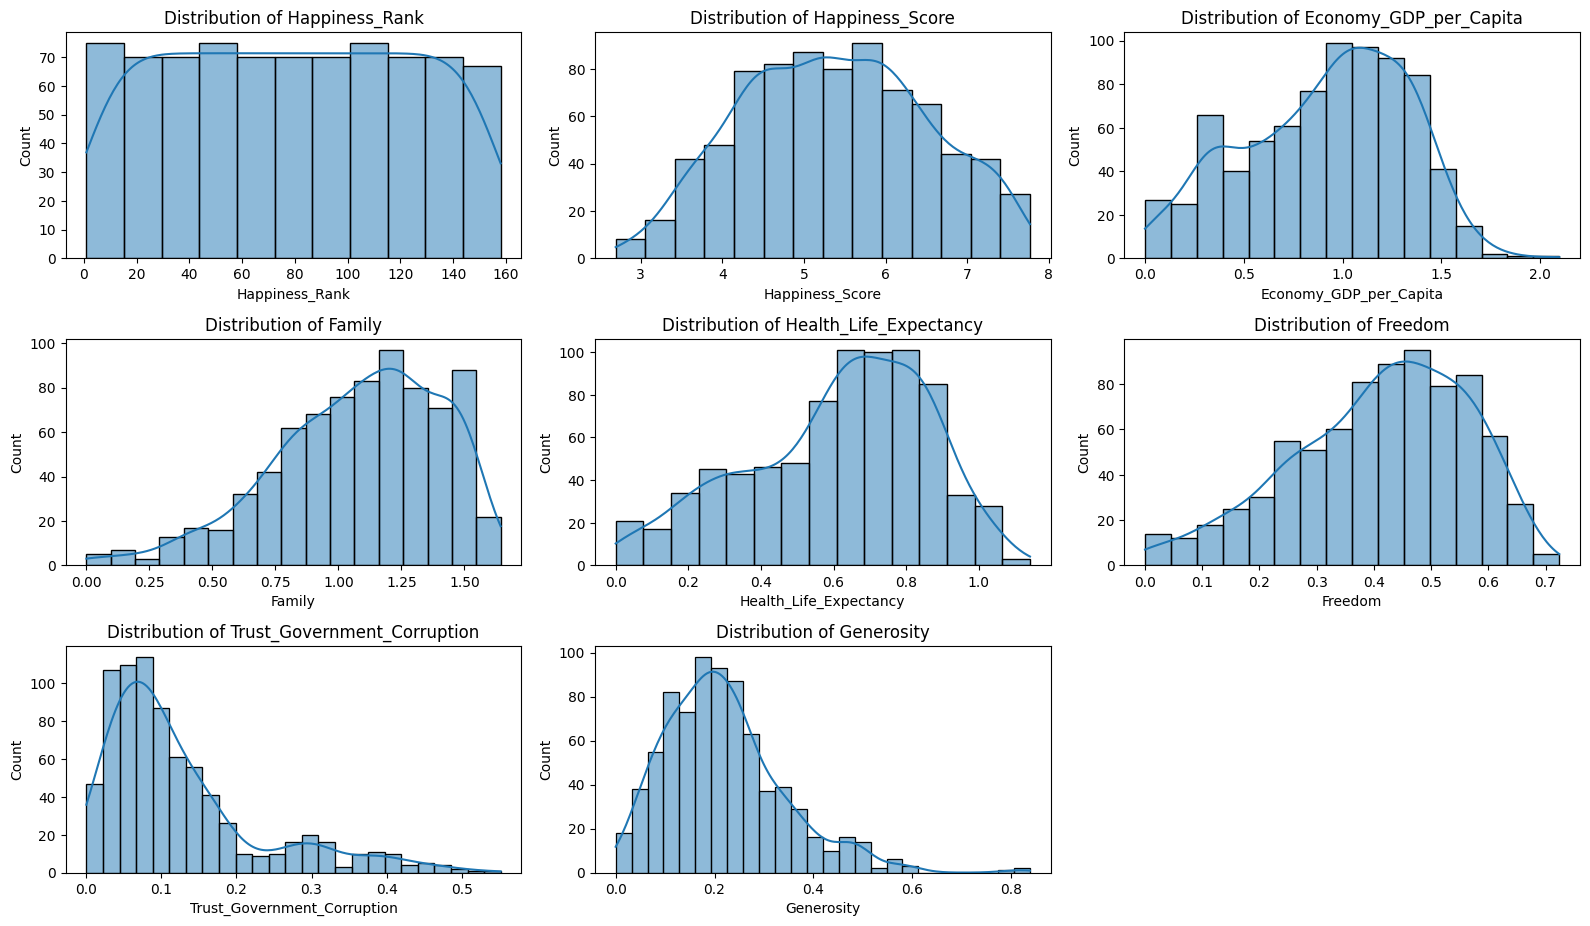

In [53]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Happiness Distribution, Range:

This graph shows how happiness levels are categorized into different categories or intervals. 
For example, it could represent the number of people in each happiness range (e.g., "Very Happy", "Happy", "Neutral", "Unhappy", "Very Unhappy").
The vertical axis represents the frequency or number of people in each range, while the horizontal axis shows the rating intervals.

Happiness Distribution, Score:

- Here, the graph represents the frequency of happiness scores assigned to people in a population.
- Scores can vary depending on the methodology used (e.g., surveys, scales from 1 to 10, etc.). The higher the score, the greater the perceived happiness.

Economic Distribution, GDP per Capita:

- This graph shows how Gross Domestic Product (GDP) per capita is distributed among the population.
- Countries with higher GDP per capita will have a different distribution than those with lower GDP per capita.

Family Distribution:

- Visualizes the importance of family or social support in contributing to well-being.
- It may show how the quality of family relationships affects people's happiness.

Healthy Life Expectancy Distribution:

- Shows the relationship between health and longevity with happiness.
- Countries with higher healthy life expectancy may have a different distribution in this graph.

Freedom Distribution:

- Reflects how the perception of personal freedom affects happiness.
- Individual freedom may vary depending on cultural and political context.

Government Corruption Trust Distribution:

- Displays the frequency of trust in the government and its impact on happiness.
- Countries with lower government corruption may have a different distribution in this graph.

Generosity Distribution:

- Illustrates how acts of generosity may correlate with happiness.
- It may represent the frequency of altruistic behaviors or donations.

Categorical Variables Distributions

C:\Users\juanj\AppData\Local\Temp\ipykernel_20388\2257750332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')
C:\Users\juanj\AppData\Local\Temp\ipykernel_20388\2257750332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


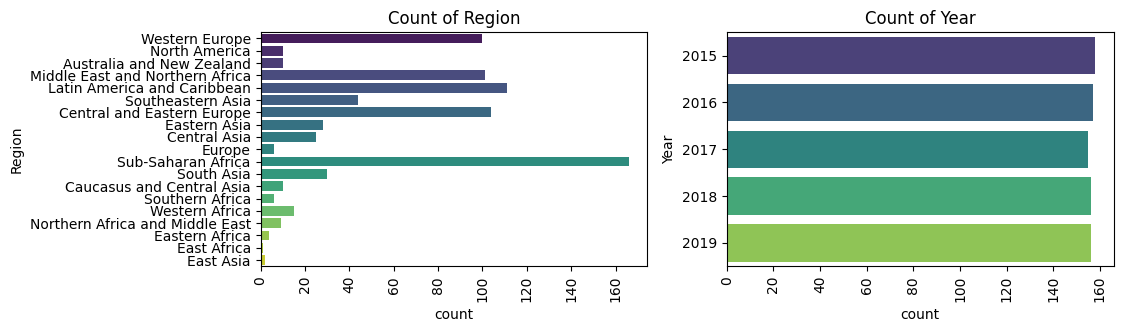

In [54]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Country']

plt.figure(figsize=(16, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data[column], palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**Regional Diversity:**
The first graph, "Count of Region," shows the number of data points or events per region. Longer bars indicate a higher frequency or quantity in that specific region, which could suggest greater relevance or activity compared to other regions.

**Temporal Trends:**
The second graph, "Count of Year," illustrates the number of data points or events per year. This can help identify trends over time, such as an increase or decrease in the frequency of the represented data or events.

**Comparisons and Patterns:**
By comparing the bars between different regions and years, patterns or anomalies can be identified, such as regions or years with unusually high or low activity.

Scatterplot to Hapiness Score

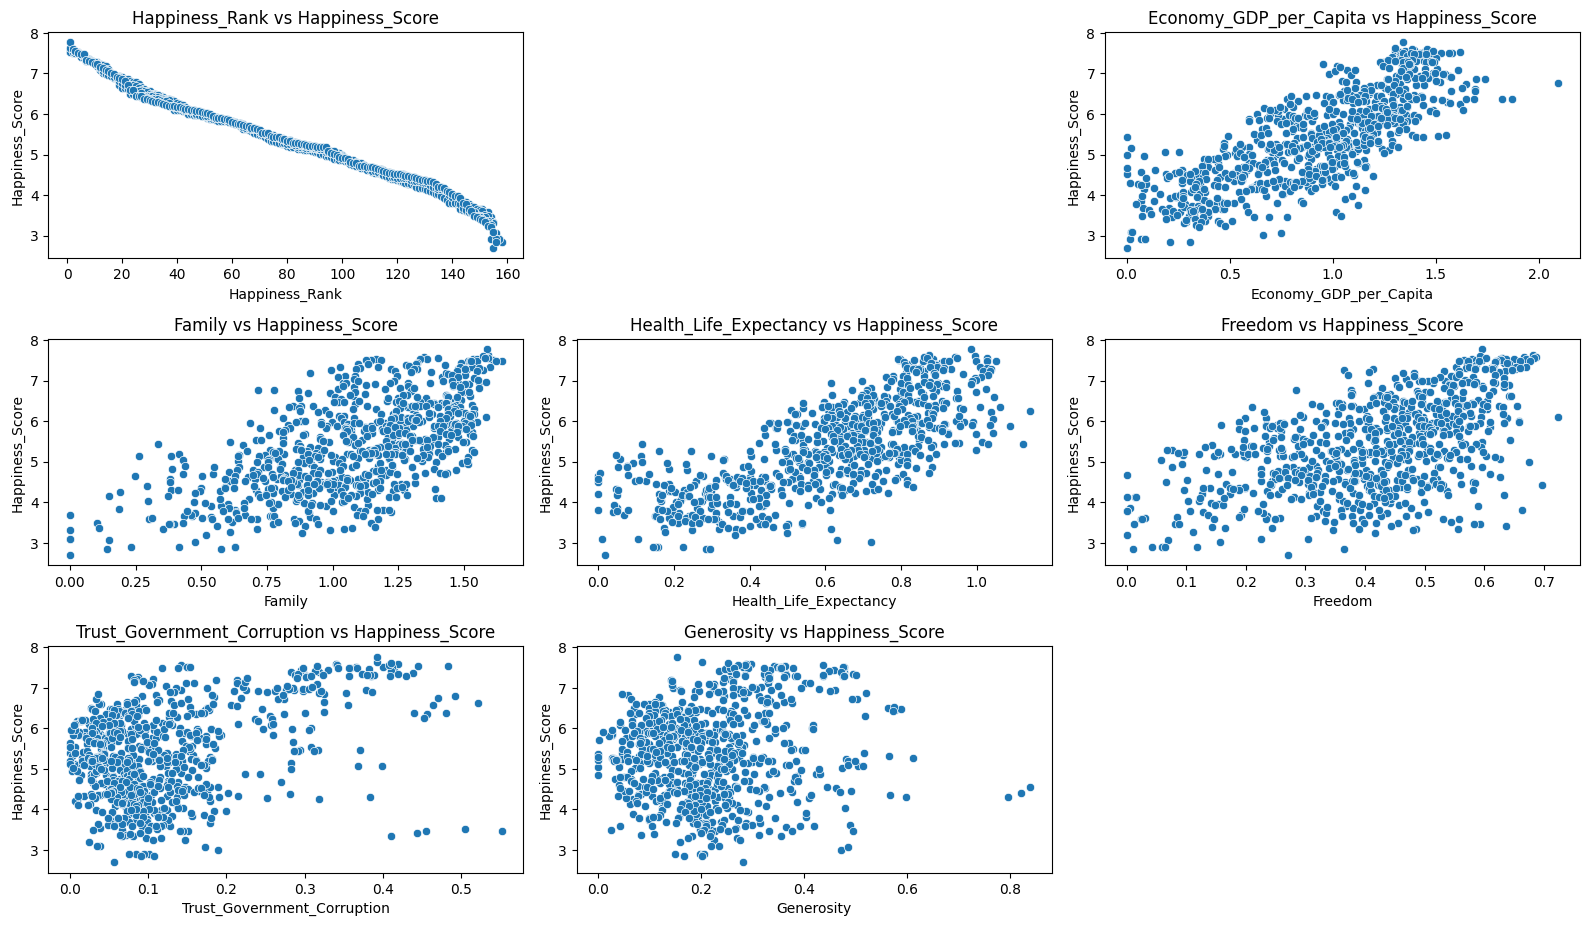

In [55]:
target = 'Happiness_Score'

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    if column != target:
        plt.subplot(4, 3, i)
        sns.scatterplot(x=data[column], y=data[target])
        plt.title(f'{column} vs {target}')
plt.tight_layout()
plt.show()


- Happiness_Rank vs Happiness_Score:
The graph shows an inverse relationship between happiness rank and happiness score. As the happiness rank decreases (i.e., gets closer to number 1, indicating higher happiness), the happiness score increases. This graph confirms that countries with better happiness ranks have higher happiness scores.

- Economy_GDP_per_Capita vs Happiness_Score:
This graph shows a positive correlation between GDP per capita and happiness score. As GDP per capita increases, so does the happiness score. This suggests that wealthier countries tend to be happier.

- Family vs Happiness_Score:
Here, a positive correlation is observed between family support (measured as "Family") and happiness score. Countries with higher family support values tend to have higher happiness scores.

- Health_Life_Expectancy vs Happiness_Score:
This graph shows a positive correlation between healthy life expectancy and happiness score. Countries with higher healthy life expectancy tend to be happier.

- Freedom vs Happiness_Score:
The relationship between freedom and happiness score is also positive. Greater freedom correlates with higher happiness scores, suggesting that the perception of freedom in life is associated with greater happiness.

- Trust_Government_Corruption vs Happiness_Score:
The relationship between trust in government (and perception of corruption) and happiness score is less clear. There is a weak trend suggesting that higher trust in government (less corruption) might be associated with higher happiness, but the dispersion of the points indicates that other important factors are at play.

- Generosity vs Happiness_Score:
Finally, the graph of generosity and happiness score shows a weak positive relationship. Countries where people are more generous tend to be slightly happier, although the relationship is not as strong as with other factors.

Boxplots of Categorical Variables

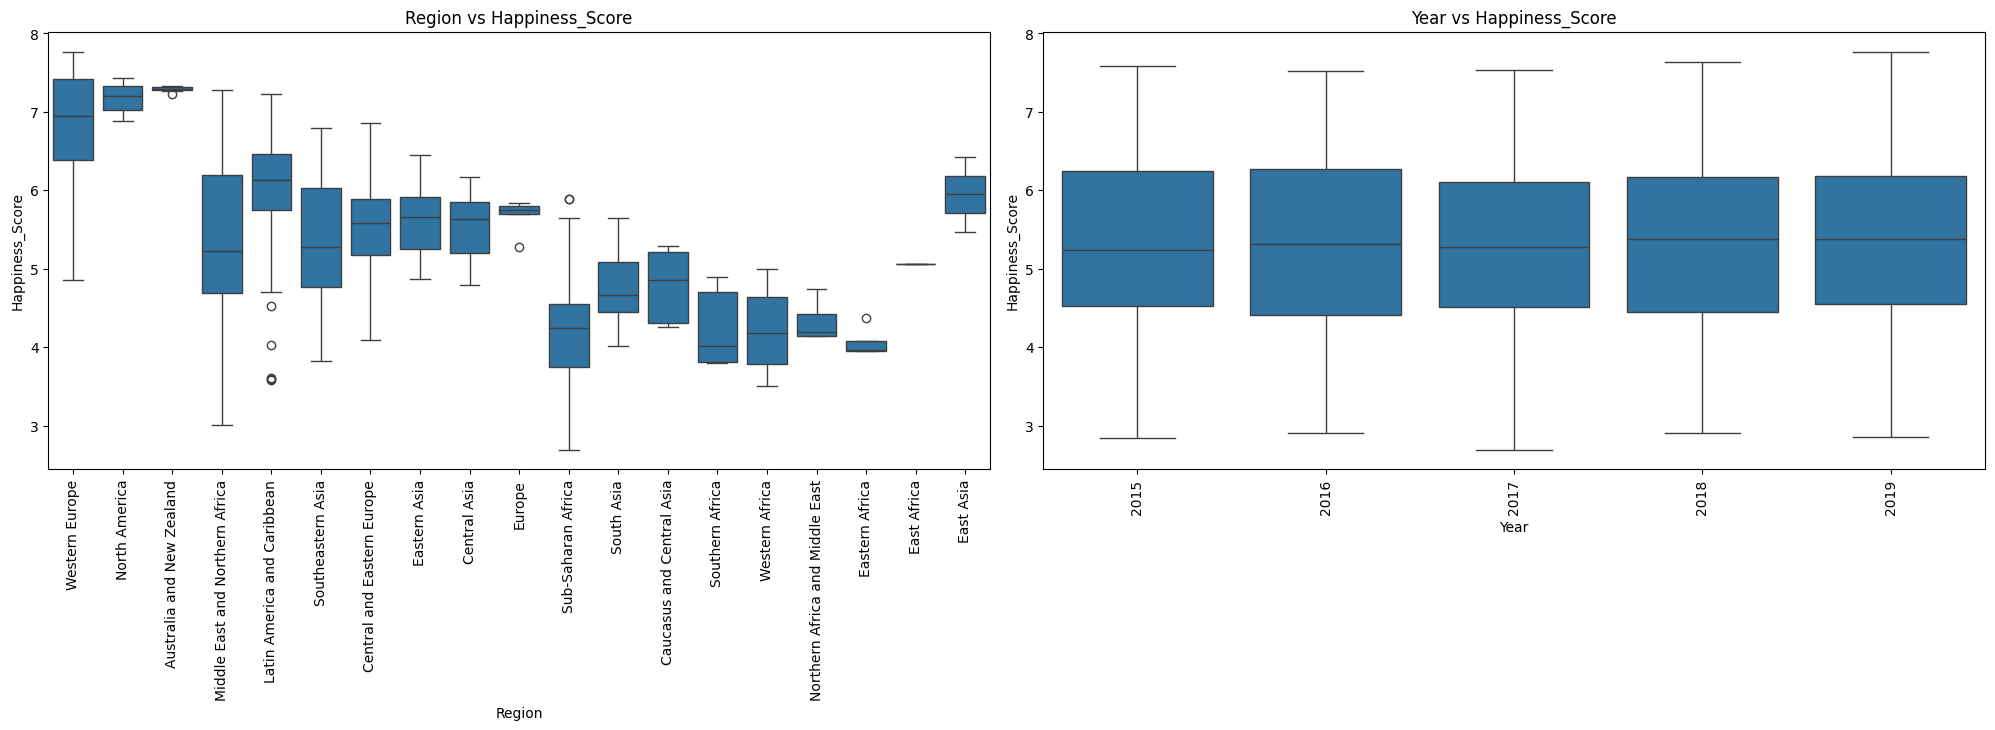

In [56]:
plt.figure(figsize=(30, 26))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column], y=data[target])
    plt.title(f'{column} vs {target}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Boxplot of Numeric Variables

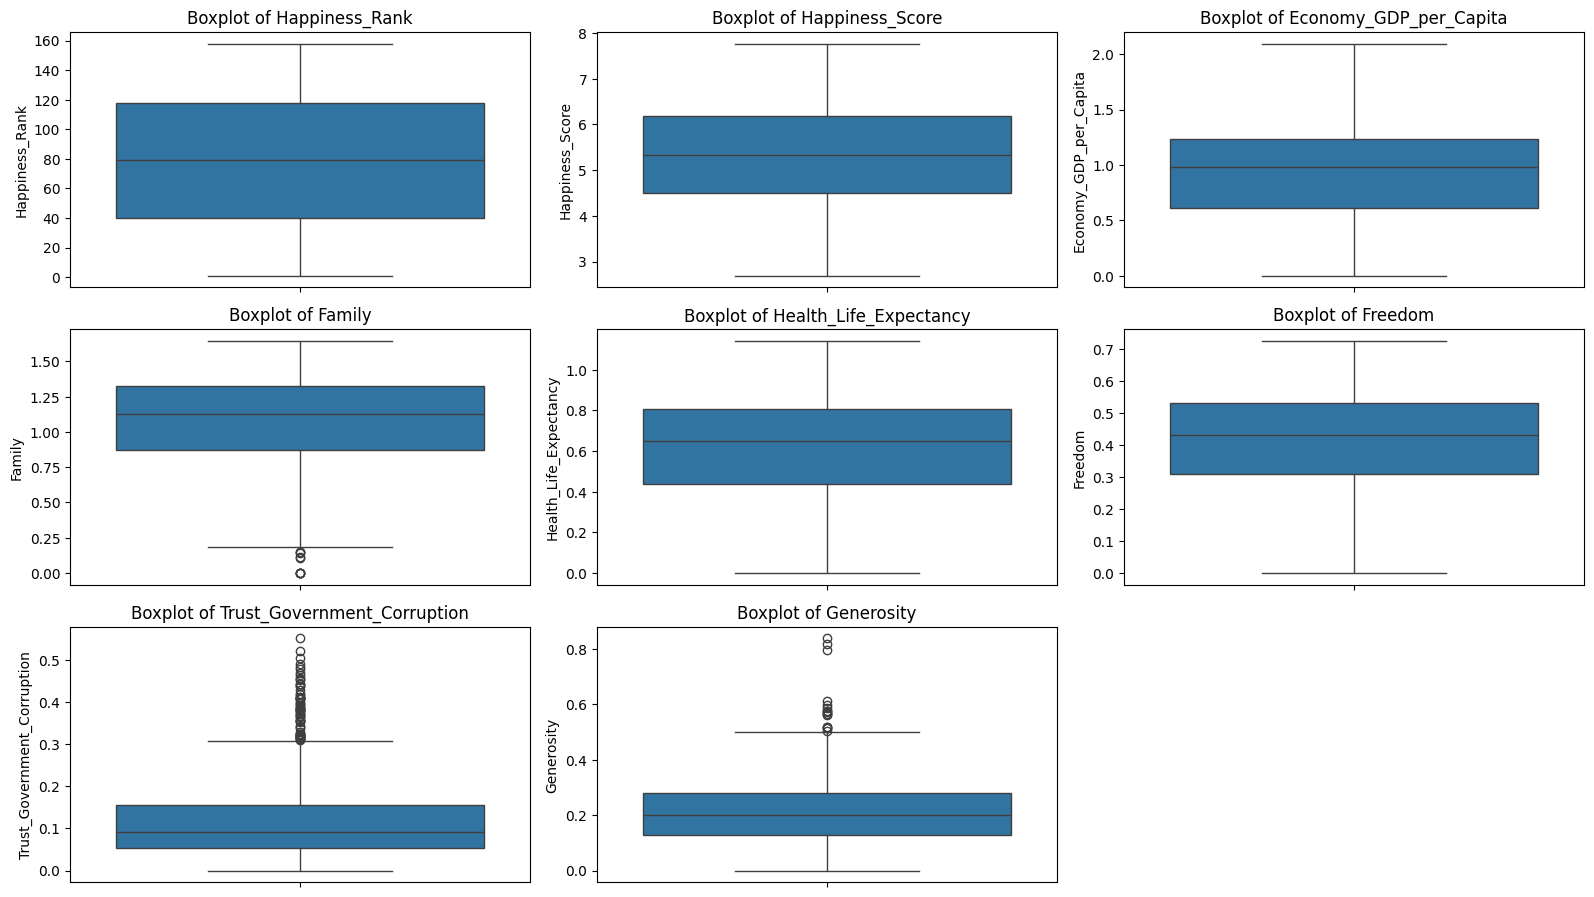

In [57]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


- Regional Differences:

Western Europe and North America exhibit the highest median happiness scores, suggesting that these regions have a higher overall level of happiness. Factors contributing to this could include better economic conditions, higher life expectancy, and stronger social support systems.
In contrast, regions like Sub-Saharan Africa and South Asia have lower median happiness scores, indicating lower levels of happiness. This could be attributed to economic challenges, health issues, and lower levels of freedom and trust in government.

- Temporal Trends:

The happiness scores from 2015 to 2019 appear relatively stable, with no significant upward or downward trends. This suggests that overall global happiness levels remained consistent during these years, despite varying global events and changes.

- Economic Factors:

There is a clear positive correlation between GDP per capita and happiness scores. Wealthier countries tend to have happier populations, likely due to better access to resources, healthcare, and overall quality of life.

- Social Support and Health:

Strong family support and higher life expectancy are positively associated with higher happiness scores. This underscores the importance of social relationships and health in contributing to a person's overall well-being.

- Freedom and Trust in Government:

Higher perceived freedom and lower corruption are linked to higher happiness scores. This indicates that people in countries with more personal freedoms and trustworthy governments tend to be happier.

- Generosity:

While the correlation between generosity and happiness is weaker compared to other factors, there is still a positive relationship. Societies that exhibit higher levels of generosity tend to report higher happiness scores.

Correlation Matrix

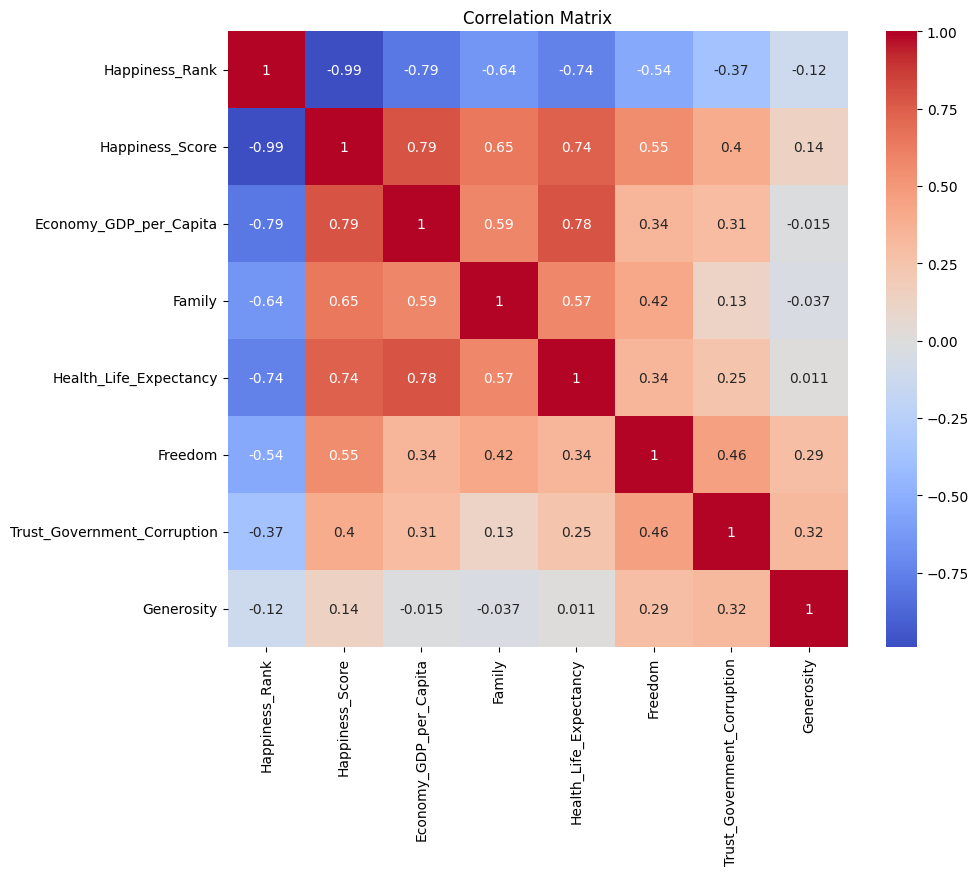

In [58]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

- Strong Positive Correlations:

GDP per Capita and Happiness Score: A correlation value of approximately 0.79 indicates a strong positive relationship. This suggests that as GDP per capita increases, happiness scores also tend to be higher. Wealthier countries generally have higher happiness levels due to better access to resources, healthcare, and overall quality of life.

Healthy Life Expectancy and Happiness Score: A correlation value close to 0.74 shows a significant positive relationship. Countries with higher healthy life expectancy tend to have higher happiness scores, highlighting the importance of health and longevity in overall well-being.

- Strong Negative Correlations:

Happiness Rank and GDP per Capita: A correlation value of approximately -0.79 suggests a strong negative relationship. Since a lower happiness rank corresponds to higher happiness (rank 1 being the happiest), this negative correlation means that countries with higher GDP per capita tend to have better (lower) happiness ranks.

Happiness Rank and Healthy Life Expectancy: A correlation value close to -0.74 also indicates a strong negative relationship. This means that countries with higher healthy life expectancy tend to have better (lower) happiness ranks, further emphasizing the role of health in determining happiness.

Happiness Rank and Happiness Score: There is a very strong negative correlation of approximately -0.99 between happiness rank and happiness score. This means that as the happiness rank decreases (which signifies higher happiness since rank 1 is the happiest), the happiness score increases dramatically.

 Geographic Distrubutions

C:\Users\juanj\AppData\Local\Temp\ipykernel_20388\431417894.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 2000x1000 with 0 Axes>

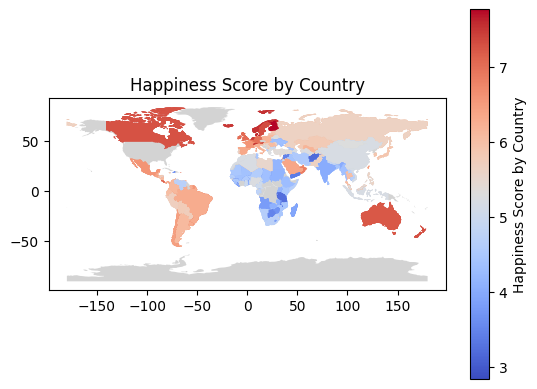

In [59]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data_geo = pd.merge(world, data, how="left", left_on="name", right_on="Country")

plt.figure(figsize=(20, 10))
data_geo.plot(column='Happiness_Score', cmap='coolwarm', legend=True,
              legend_kwds={'label': "Happiness Score by Country"},
              missing_kwds={"color": "lightgrey"})
plt.title('Happiness Score by Country')
plt.show()


Here it can be appreciated that those countries located in regions which politically and socially have a very complex context with many flaws and difficulties have a much higher happiness score compared to those located in other less problematic regions.

## Training Models

In [62]:
model_data = data.copy()
model_data = model_data.dropna()

In [63]:
columns_to_use = ['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 
                  'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Year']

X = model_data[columns_to_use]
y = model_data['Happiness_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Gradient Boosting Regressor

In [64]:
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_gradient_boosting)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)

print("Metrics of Gradient Boosting model:")
print(f"R^2: {r2_gradient_boosting}")
print(f"MAE: {mae_gradient_boosting}")
print(f"MSE: {mse_gradient_boosting}")

Metrics of Gradient Boosting model:
R^2: 0.8019327931506892
MAE: 0.39254789063758655
MSE: 0.24732477881022225


In [65]:
best_r2_gradient_boosting = -np.inf
best_mae_gradient_boosting = np.inf
best_mse_gradient_boosting = np.inf
best_y_pred_gradient_boosting = None

iterations = 50

for i in range(iterations):
    
    gradient_boosting_model = GradientBoostingRegressor(random_state=i)
    gradient_boosting_model.fit(X_train, y_train)
    y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
    
    r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)
    mae_gradient_boosting = mean_absolute_error(y_test, y_pred_gradient_boosting)
    mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
    
    if r2_gradient_boosting > best_r2_gradient_boosting:
        best_r2_gradient_boosting = r2_gradient_boosting
        best_mae_gradient_boosting = mae_gradient_boosting
        best_mse_gradient_boosting = mse_gradient_boosting
        best_y_pred_gradient_boosting = y_pred_gradient_boosting

print("Metrics of the Gradient Boosting model:")
print(f"R^2: {best_r2_gradient_boosting}")
print(f"MAE: {best_mae_gradient_boosting}")
print(f"MSE: {best_mse_gradient_boosting}")

Metrics of the Gradient Boosting model:
R^2: 0.8027278875105529
MAE: 0.3910408830200169
MSE: 0.24633195147744644


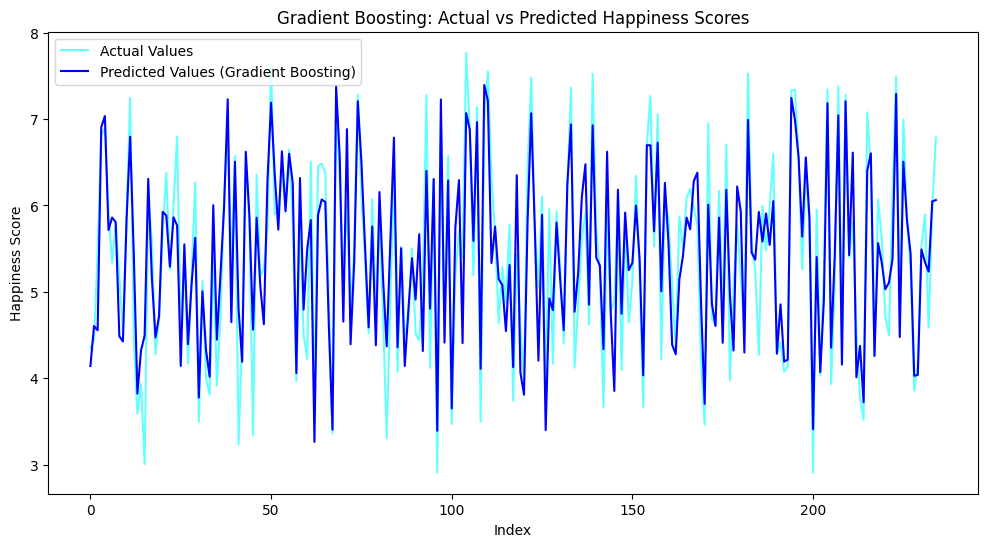

In [66]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-', alpha=0.6)

plt.plot(range(len(y_test)), best_y_pred_gradient_boosting, label='Predicted Values (Gradient Boosting)', color='blue', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Gradient Boosting: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

### Linear Regression

In [67]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred_linear_regression = linear_regression_model.predict(X_test)

r2_linear_regression = r2_score(y_test, y_pred_linear_regression)
mae_linear_regression = mean_absolute_error(y_test, y_pred_linear_regression)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)

print("Metrics of the linear regression model:")
print(f"R^2: {r2_linear_regression}")
print(f"MAE: {mae_linear_regression}")
print(f"MSE: {mse_linear_regression}")

Metrics of the linear regression model:
R^2: 0.7632021824967564
MAE: 0.4201016400225442
MSE: 0.29568735162348186


Adjusting Model

In [68]:
best_r2_linear_regression = -np.inf
best_mae_linear_regression = np.inf
best_mse_linear_regression = np.inf

iterations = 50

for i in range(iterations):
    
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)
    y_pred_linear_regression = linear_regression_model.predict(X_test)
    
    r2_linear_regression = r2_score(y_test, y_pred_linear_regression)
    mae_linear_regression = mean_absolute_error(y_test, y_pred_linear_regression)
    mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
    
    if r2_linear_regression > best_r2_linear_regression:
        best_r2_linear_regression = r2_linear_regression
        best_mae_linear_regression = mae_linear_regression
        best_mse_linear_regression = mse_linear_regression
        best_y_pred_linear_regression = y_pred_linear_regression

print("Best Metrics of the linear regression model:")
print(f"R^2: {best_r2_linear_regression}")
print(f"MAE: {best_mae_linear_regression}")
print(f"MSE: {best_mse_linear_regression}")

Best Metrics of the linear regression model:
R^2: 0.7632021824967564
MAE: 0.4201016400225442
MSE: 0.29568735162348186


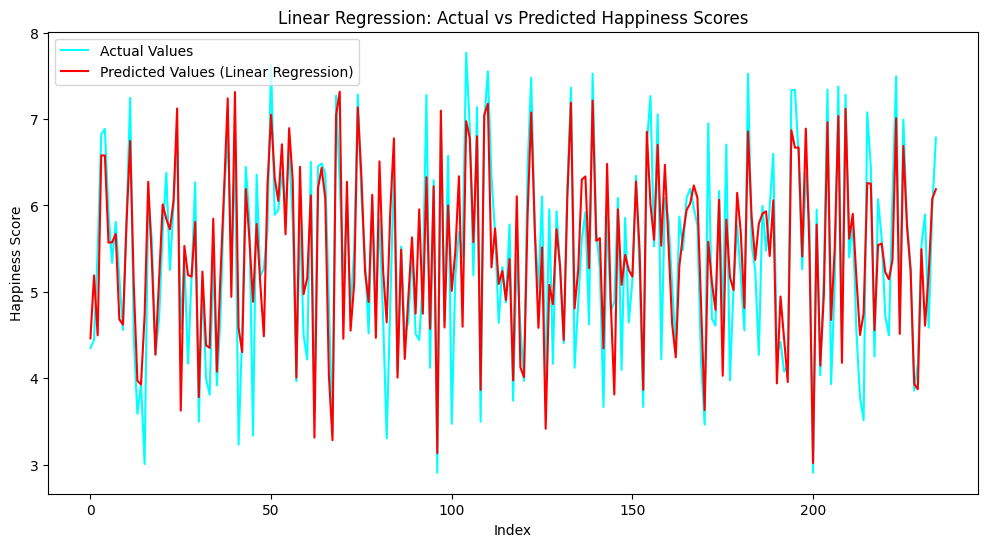

In [69]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), best_y_pred_linear_regression, label='Predicted Values (Linear Regression)', color='red', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Linear Regression: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

### Random Forest Regressor

In [70]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

r2_random_forest = r2_score(y_test, y_pred_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

print("Metrics of Random Forest model:")
print(f"R^2: {r2_random_forest}")
print(f"MAE: {mae_random_forest}")
print(f"MSE: {mse_random_forest}")

Metrics of Random Forest model:
R^2: 0.8116831100675034
MAE: 0.3785834476080306
MSE: 0.23514964384901024


Adjusting Model

In [71]:
best_r2_random_forest = -np.inf
best_mae_random_forest = np.inf
best_mse_random_forest = np.inf

iterations = 50

for i in range(iterations):
    
    random_forest_model = RandomForestRegressor()
    random_forest_model.fit(X_train, y_train)
    y_pred_random_forest = random_forest_model.predict(X_test)
    
    r2_random_forest = r2_score(y_test, y_pred_random_forest)
    mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
    mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
    
    if r2_random_forest > best_r2_random_forest:
        best_r2_random_forest = r2_random_forest
        best_mae_random_forest = mae_random_forest
        best_mse_random_forest = mse_random_forest
        best_y_pred_random_forest = y_pred_random_forest

print("Best Metrics of Random Forest model:")
print(f"R^2: {best_r2_random_forest}")
print(f"MAE: {best_mae_random_forest}")
print(f"MSE: {best_mse_random_forest}")

Best Metrics of Random Forest model:
R^2: 0.8175577151325822
MAE: 0.377594512275268
MSE: 0.22781407618271088


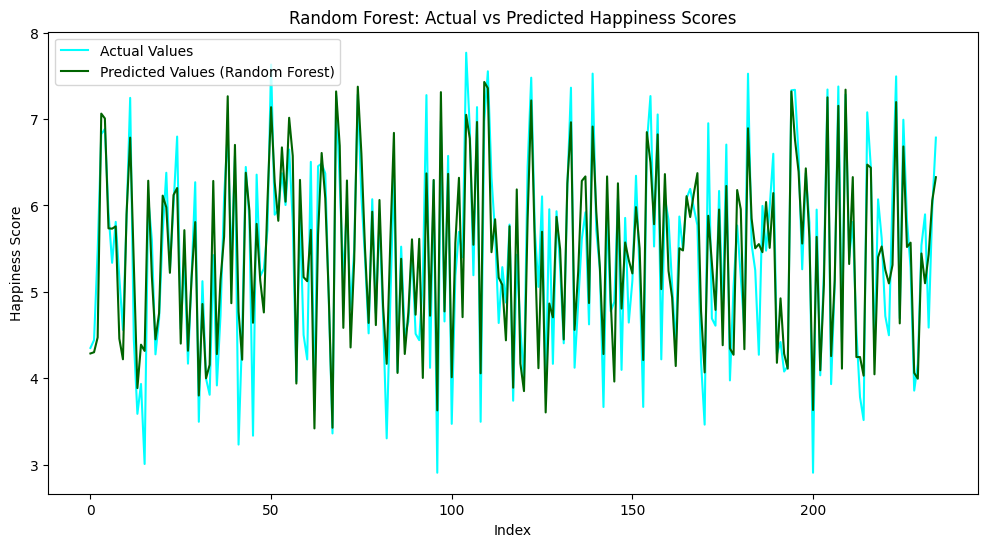

In [72]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), best_y_pred_random_forest, label='Predicted Values (Random Forest)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Random Forest: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()


In [73]:
#joblib.dump(random_forest_model, '../model/random_forest_model.pkl')

## Conclusion

Best Metrics of Random Forest model:

R^2: +0.81

MAE: 0.37

MSE: 0.22

Based on the obtained metrics, the Random Forest model outperforms the others in terms of R^2, MAE, and MSE. With an R^2 value of 0.81+ and lower MAE and MSE values compared to the Linear Regression model, the Random Forest model demonstrates superior predictive performance.